In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('titanic.csv')

In [12]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [13]:
for col in df.columns:
    df[col] = df[col].astype(float)

In [14]:
X = df.drop('Survived', axis=1).values
y = df['Survived'].values.reshape(-1, 1)

In [15]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_std[X_std == 0] = 1.0
X = (X - X_mean) / X_std

In [16]:
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
train_idx, test_idx = indices[:train_size], indices[train_size:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [17]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_pred):
        m = y.shape[0]
        epsilon = 1e-15 # To prevent log(0)
        return - (1/m) * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros((n, 1))
        self.bias = 0

        for i in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            self.loss_history.append(self._compute_loss(y, y_pred))

            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

In [18]:
model = LogisticRegressionScratch(learning_rate=0.1, iterations=1000)
model.fit(X_train, y_train)

In [20]:
y_pred_proba = model.predict_proba(X_test)
y_pred = (y_pred_proba >= 0.5).astype(int)
mse = np.mean((y_test - y_pred_proba)**2)
rmse = np.sqrt(mse)
tp = np.sum((y_test == 1) & (y_pred == 1))
tn = np.sum((y_test == 0) & (y_pred == 0))
fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))

accuracy = (tp + tn) / len(y_test)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [23]:
print(f"Final Results")
print(f"MSE:       {mse:.4f}")
print(f"RMSE:      {rmse:.4f}")
print(f"Accuracy:  {accuracy:.4f}")
print(f"F1 Score:  {f1:.4f}")

Final Results
MSE:       0.1390
RMSE:      0.3729
Accuracy:  0.7877
F1 Score:  0.7077


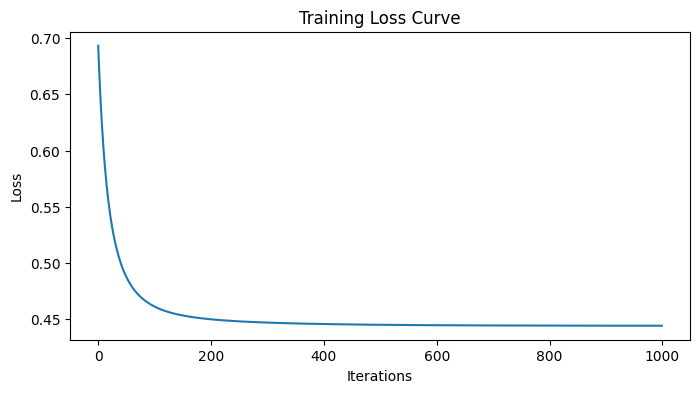

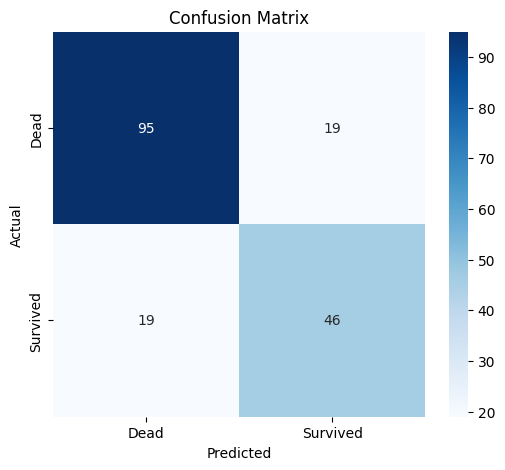

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(model.loss_history)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('loss_curve.png')

plt.figure(figsize=(6, 5))
cm = [[int(tn), int(fp)], [int(fn), int(tp)]]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dead', 'Survived'], yticklabels=['Dead', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')